<a href="https://colab.research.google.com/github/elizavetasemenova/indaba-pracs-2023/blob/intro-to-probability/Copy_of_Copy_of_Introduction_to_Probabilistic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpyro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
import jax
from jax import random
import jax.numpy as jnp
import numpyro.distributions as dist

from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

# Since we are using Jax, we will need a random key:
rng = random.PRNGKey(42)

# New section

In order to dive into the exciting world of probabilistic programming, we first need to build some important foundations. In particular, we will need understand what a probability distribution is, some simple but fundamental rules of probability, and how to interact with probabilities in code.

# Probability distributions and random variables

Probability distributions and random variables allow us to describe and do calculations involving random events, i.e., events whose outcomes are random. An example of such a random event would be flipping a coin or rolling a die. In the first case, the possible outcomes are *heads* or *tails*.

**Group task 1:** discuss with your neighbours, what are the possible outcomes when rolling a die?


A **random variable** $X$ allows us to assign numerical values to the possible outcomes of a random event. For example in the coin flipping example we could use a binary random varible with $X = 1$ if the coin is heads and $X = 0$ for tails.

**Group task 2:** discuss with your neighbours and write down a random variable to describe the die rolling event.

A **probability distribution** $p(X = x)$ describes the probability that $X$ takes each of its possible values $x$.

In order to make things more concrete, let's explore a few common probabilty distributions.

#### Answer to group task 1

Assuming that the die has 6 sides, the outcomes are ⚀, ⚁, ⚂, ⚃, ⚄, and ⚅.

#### Answer to group task 2


Note that there are many possible answers, here is one:

$$
X = \begin{cases}
0 \text{ if } ⚀ \\
1 \text{ if } ⚁ \\
2 \text{ if } ⚂ \\
3 \text{ if } ⚃ \\
4 \text{ if } ⚄ \\
5 \text{ if } ⚅ \\
\end{cases}
$$

### The Bernoulli distribution

A Bernoulli distribution is used to describe random events with two possible outcomes e.g., when we have a random variable that takes on one of two values $x \in \{0, 1\}$:
\begin{align}
p(X = 1) &= p \\
p(X = 0) &= 1 - p
\end{align}
where $0 \le p \le 1$. Here $p$ is a parameter which controlls the probability of each outcome. For example, in the case of a *fair* coin toss, $p = 0.5$ so that both outcomes have a 50\% chance of occuring. As we will see shortly, most distributions have multiple parameters.

A probability distribution can be uniquely defined by its probability mass function (PMF), or probability desnity function (PDF) in the case of continuous distributions. For the Bernoulli distribution we write the PMF as
\begin{align}
p(X = x) = \text{Bernoulli}(X\mid p) &= \begin{cases}
p\, & \text{if } x = 1 \\
1 - p\, & \text{if } x = 0
\end{cases} \\
&= p^x(1-p)^{1-x}.
\end{align}

**Exercise:** convince yourself that the two definitions of the Bernoulli distribution shown above are equivalent.

Now let's construct a Bernoulli distribution in code, so that we can play around with it and get some intuition.

**Note:** In this practical we are going to use `numpyro` to construct our distributions. However there are several other `jax` packages that work similarly (e.g., `distrax`) as well as several options for `tensorflow` (e.g., `tensorflow_probability`) and `pytorch` (e.g., `torch.distribution`). Don't worry too much about the specifics of how `numpyro` works, e.g., the names of the distributions and their arguments, instead try to understand what the code is doing.

In [ ]:
p = jnp.array(0.5)
bernoulli = dist.Bernoulli(probs=p)

Now that we have constructed the distribution we can get a sample from it:

In [ ]:
sample = bernoulli.sample(key=rng)
print(sample)

1


And we can evaluate the probability of observing a sample.

**Note:** the distribution objects in `numpyro` (and indeed most other libraries for probability distributions) return *log*-probabilities, rather than raw probabilities. This means that we need to take the exponent if we want to know the probabilitiy.

In [ ]:
log_prob = bernoulli.log_prob(sample)
print(f"log p(X = {sample}) = {log_prob}")
print(f"p(X = {sample}) = {jnp.exp(log_prob)}")

log p(X = 1) = -0.6931471824645996
p(X = 1) = 0.5


As expected, we get a probability of 0.5.

We can also easily get multiple samples:

In [ ]:
n = 6 #@param {type:"slider", min:1, max:10, step:1}
samples = bernoulli.sample(key=rng, sample_shape=(n,))
print(samples)

[0 0 0 1 1 0]


What if we wanted to evaulate the probability of observing all of our samples?

The `bernoulli` object we created earlier treats each each sample individually, and returns the probabilities of observing each sample on its own:

In [ ]:
individual_sample_probs = jnp.exp(bernoulli.log_prob(samples))
print(individual_sample_probs)

[0.5 0.5 0.5 0.5 0.5 0.5]


But, we can use the one of the laws of probability to compute the probability of observing all of the samples together:
$$
p(X_1=x_1, X_2=x_2, \dots, X_N=x_n) = \prod_{n=1}^N p(X_n=x_n).
$$
This is called the *product rule of probability*, and it says that for *independent* random variables, the joint probability (i.e., the probability of observing them all together) is equal to the product of the individual probabilities.

Now, let's calculate the joint probability of our samples.

In [ ]:
joint_prob = jnp.prod(individual_sample_probs)
print(joint_prob)

0.015625


**Group task 3:** Discuss with your neighbour, why do you think that libraries usually return *log*-probabilities?

**Group task 4:** Play with the following slider, and make sure that you understand the role of the Bernoulli distribution's $p$ parameter.

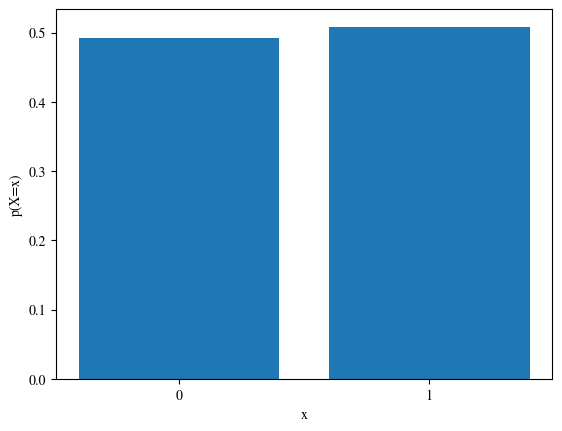

In [ ]:
#@title Bernolli distribution interactive excercise { run: "auto" }

p_ = 0.52 #@param {type:"slider", min:0, max:1, step:0.01}

n_ = 1000
bernoulli_ = dist.Bernoulli(probs=p_)
samples_ = bernoulli_.sample(key=rng, sample_shape=(n_,))

num_ones = (samples_ == 1.).sum()
num_zeros = (samples_ == 0.).sum()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.bar([0, 1], [num_zeros/n_, num_ones/n_])
ax.set_xticks([0, 1])
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
plt.show()

#### Answer to group task 3


The answer, as is often the case, is numerical stability! When working with numbers between 0 and 1 (i.e., probabilities) it is easy to run into underflow.

For example, consider computing the probability of several independent events $A$, $B$, $C$, $\ldots$:
$$
p(A, B, C, \ldots) = p(A) \times p(B) \times p(C) \times \ldots,
$$
because we are multiplying numbers that are between 0 and 1, we know that the result will be smaller for each multiplication. As we perform more and more multiplications, it becomes more likely that the computation will underflow and erroneously produce a result of 0.

We can avoid this problem by instead working with log-probabilities. Continuing the above example we get
$$
\log p(A, B, C, \ldots) = \log p(A) + \log p(B) + \log p(C) + \ldots,
$$
where by the log laws, we have replaced all of the multiplications with additions, thereby avoiding any numerical issues.

## The categorical distribution

A categorical distribution is used to model random events with multiple *discrete* outcomes, such as the die rolling event from above. By discrete, we mean that there is a countable number of outcomes. We will tackle uncountable outcomes shortly.

As with the Bernoulli distribution, we can characterise the categorical distribution with its PMF:
\begin{align}
p(X = x) = \text{categorical}(X\mid\mathbf{p}) = \prod_{k=1}^K p_k^{[x=k]},
\end{align}
where $K$ is the number of outcomes, $\textbf{p} = [p_1, p_2, \dots, p_K]$, $p_k$ is the probability of the $k$th outcome, $\sum_k p_k = 1$, and $[x = k]$ is called an Iverson bracket which evaluates to 1 if $x = k$ and 0 otherwise.

**Exercise:** convince yourself that a categorical distribution with $K = 2$ is equivalent to a Bernoulli distribution.

Now, let's start playing with this distribution in code!

In [ ]:
ps = jnp.array([0.1, 0.2, 0.3, 0.4])
categorical = dist.Categorical(probs=ps)

As before we can take some samples:

In [ ]:
samples = categorical.sample(key=rng, sample_shape=(10,))
print(samples)

[3 2 1 3 3 1 2 1 3 3]


And compute the probability for each of the random events:

In [ ]:
print(f"p(X=0) = {jnp.exp(categorical.log_prob(0)):.1f}")
print(f"p(X=1) = {jnp.exp(categorical.log_prob(1)):.1f}")
print(f"p(X=2) = {jnp.exp(categorical.log_prob(2)):.1f}")
print(f"p(X=3) = {jnp.exp(categorical.log_prob(3)):.1f}")

p(X=0) = 0.1
p(X=1) = 0.2
p(X=2) = 0.3
p(X=3) = 0.4


**Group task 5:** Play with the following sliders, which control the paramters of the categorical distribution. Note that because $\sum_k p_k = 1$, we are using an alternative way to represent the categorical distribution. Instead of specifying the probabilities $p_k$, we specifiy logits $l_k$. Each $p_k$ is then computed as
$$
p_k = \frac{\exp(l_k)}{\sum_{k'}\exp(l_k)},
$$
i.e., using the softmax function.

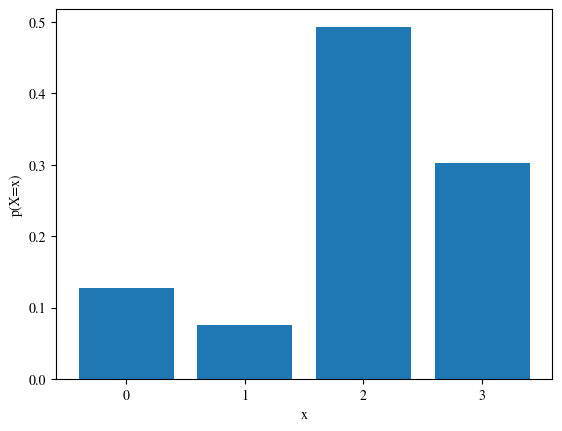

In [ ]:
#@title categorical distribution interactive excercise {run: "auto"}
l_0 = 0.7 #@param {type:"slider", max:4, step:0.1}
l_1 = 0.3 #@param {type:"slider", max:4, step:0.1}
l_2 = 2 #@param {type:"slider", max:4, step:0.1}
l_3 = 1.6 #@param {type:"slider", max:4, step:0.1}

logits_ = jnp.array([l_0, l_1, l_2, l_3], dtype=jnp.float32)
categorical_ = dist.Categorical(logits=logits_)
samples_ = categorical_.sample(key=rng, sample_shape=(1000,))

values =[0, 1, 2, 3]
hist, _ = jnp.histogram(
    samples_, bins=jnp.array(values + [4]), density=True
)

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.bar(values, hist)
ax.set_xticks(values)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
plt.show()

## The normal distribution

The normal, also known Gaussian, distribution is one of the most common distributions for modelling *continuous* random variables, i.e., corresponding to events with an uncountable number of outcomes. It's probability density function is
$$
p(X = x) = \mathcal{N}(x\mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(\mu - x)^2}{\sigma^2}\right),
$$
where $\mu$ (also called the location) and $\sigma$ are the *mean* and *standard deviation* (also called the scale or square-root of the *variance* $\sigma^2$).

Once again, the best way to get a sense for this distribution is to play with some code!

**Group task 6:** play with the following sliders, and discuss with your neighbours – how do the mean and standard deviation affect the samples?

In [ ]:
normal = dist.Normal(loc=0., scale=1.)
sample = normal.sample(key=rng)
print(f"p(X = {sample}) = {jnp.exp(normal.log_prob(sample)):.5f}")

p(X = -0.1847117692232132) = 0.39219


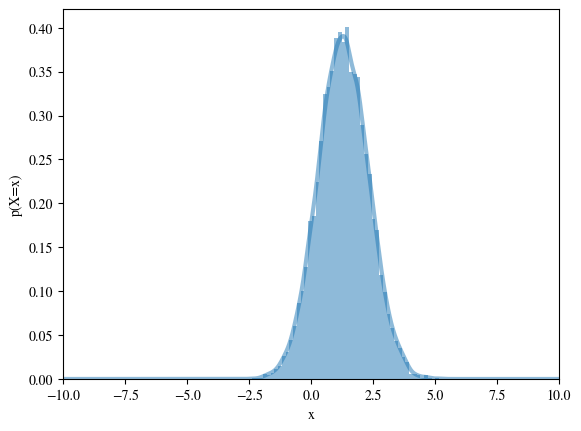

In [ ]:
#@title normal distribution interactive excercise {run: "auto"}
μ_ = 1.3 #@param {type:"slider", min:-5, max:5, step:0.1}
σ_ = 1 #@param {type:"slider", max:4, step:0.1}

normal = dist.Normal(loc=μ_, scale=σ_)
samples_ = normal.sample(key=rng, sample_shape=(10000,))

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.hist(samples_, bins=50, density=True, alpha=0.5)
x = jnp.linspace(-10, 10, 3000)
kde = gaussian_kde(samples_)
ax.plot(x, kde(x), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
ax.set_xlim(-10, 10)
plt.show()

TODO: add coding excercise to implement the normal pdf manually.

#### Answer to group task 6



The mean controls where the center of the distribution is located. In other words, it controls where the most likely location to sample values is.

The standard deviation controls how wide the distribution is. In other words, it controls how likely we are to draw samples farther away from the mean.

### Expected Values

TODO: introduce the idea of expected values and tie it to estimating the mean and variance of the normal as examples.

### Reparameterisation

TODO: introduce the idea of reparamterisation to convert samples from N(0, 1) to N(μ, σ). Maybe mention reparameterisation trick?

## The *multivariate* normal distribution

TODO: introduce the idea of multivariate distribution and covariance via the multivariate normal.

### Batch and event shapes

In [ ]:
values = jnp.array([1., 2.])
normal = dist.Normal(0., 1.)
print(normal.event_shape)
print(normal.batch_shape)
print(f"p(X = {values}) = {jnp.exp(normal.log_prob(values))}")

()
()
p(X = [1. 2.]) = [0.24197073 0.05399096]


In [ ]:
batch_normal = dist.Normal(jnp.array([0., 1.]), jnp.array([1., 2.]))
print(batch_normal.event_shape)
print(batch_normal.batch_shape)
print(f"p(X = {values}) = {jnp.exp(batch_normal.log_prob(values))}")
print(jnp.prod(jnp.exp(batch_normal.log_prob(values))))

()
(2,)
p(X = [1. 2.]) = [0.24197073 0.17603266]
0.042594753


In [ ]:
multivariate_diagonal_normal = dist.MultivariateNormal(jnp.array([0., 1.]), jnp.array([[1., 0.], [0., 2.**2]]))
print(multivariate_diagonal_normal.event_shape)
print(multivariate_diagonal_normal.batch_shape)
print(f"p(X = {values}) = {jnp.exp(multivariate_diagonal_normal.log_prob(values))}")

(2,)
()
p(X = [1. 2.]) = 0.042594753205776215


In [ ]:
multivariate_full_normal = dist.MultivariateNormal(jnp.array([0., 1.]), jnp.array([[1., 1.], [1., 2.**2]]))
print(multivariate_full_normal.event_shape)
print(multivariate_full_normal.batch_shape)
print(f"p(X = {values}) = {jnp.exp(multivariate_full_normal.log_prob(values))}")

(2,)
()
p(X = [1. 2.]) = 0.055732980370521545


## An important note on notation

In the text above we introduced a lot of new notation, so let's spend a little more time to make sure that everything is clear before moving on.

**$X$ vs $x$**

**$p(X = x)$ vs $p(X)$ vs $p_X(x)$ vs $p(x)$**

**What is the '$\mid$' in $p(X\mid a, b, c)$?**